In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import shutil
import cv2

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
 
%matplotlib inline

In [5]:
images=os.path.join("/kaggle/input/face-mask-detection-dataset/Medical mask/Medical mask/Medical Mask/images")
annotations=os.path.join("/kaggle/input/face-mask-detection-dataset/Medical mask/Medical mask/Medical Mask/annotations")
train=pd.read_csv(os.path.join("/kaggle/input/face-mask-detection-dataset/train.csv"))
submission=pd.read_csv(os.path.join("/kaggle/input/face-mask-detection-dataset/submission.csv"))

In [6]:
len(os.listdir(images))

6024

In [ ]:
!mkdir /kaggle/working/images
!mkdir /kaggle/working/images/train
!mkdir /kaggle/working/images/validation
!mkdir /kaggle/working/images/train/face_with_mask
!mkdir /kaggle/working/images/train/face_no_mask
!mkdir /kaggle/working/images/validation/face_with_mask
!mkdir /kaggle/working/images/validation/face_no_mask

In [26]:
source="/kaggle/input/face-mask-detection-dataset/Medical mask/Medical mask/Medical Mask/images/"
train="/kaggle/working/images/train/face_with_mask/"
train_1="/kaggle/working/images/train/face_no_mask/"

test="/kaggle/working/images/validation/face_with_mask/"
test_1="/kaggle/working/images/validation/face_no_mask/"

count=0
with open('/kaggle/input/face-mask-detection-dataset/train.csv') as csvfile:
    readCSV = list(csv.reader(csvfile, delimiter=','))
    print(len([row for row in readCSV[1:] if(row[5]=="face_with_mask" or row[5]=="face_no_mask")]))
    len_train_samples=int(len([row for row in readCSV[1:] if(row[5]=="face_with_mask" or row[5]=="face_no_mask")])*0.7)
    for row in readCSV[1:]:
        if(row[5]=="face_with_mask" or row[5]=="face_no_mask"):
            count+=1
            x1=int(row[1])
            x2=int(row[2])
            y1=int(row[3])
            y2=int(row[4])
            
            image=cv2.imread(src_path+row[0])
            image=image[x2:y2,x1:y1]
            
            if(count<=len_train_samples and row[5]=="face_with_mask"):
                cv2.imwrite(train+str(count)+".jpg",image)
            
            elif(count<=len_train_samples and row[5]=="face_no_mask"):
                cv2.imwrite(train_1+str(count)+".jpg",image)
            
            elif(count>len_train_samples and row[5]=="face_with_mask"):
                cv2.imwrite(test+str(count)+".jpg",image)
            
            elif(count>len_train_samples and row[5]=="face_no_mask"):
                cv2.imwrite(test_1+str(count)+".jpg",image)

5749


960.jpg
377.jpg
2149.jpg
2501.jpg
3039.jpg


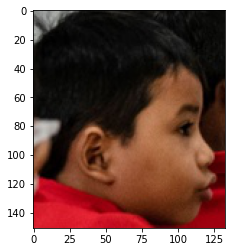

In [31]:
for pic in os.listdir("/kaggle/working/images/train/face_no_mask/")[0:5]:
    print(pic)
    img=plt.imread("/kaggle/working/images/train/face_no_mask/"+pic)
    plt.imshow(img)

In [35]:
len(os.listdir("/kaggle/working/images/train/face_no_mask/")) + len(os.listdir("/kaggle/working/images/train/face_with_mask/"))

4024

In [36]:
len(os.listdir("/kaggle/working/images/validation/face_no_mask/")) + len(os.listdir("/kaggle/working/images/validation/face_with_mask/"))

1725

In [37]:
4024+1725

5749

In [40]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [43]:
training_dir = "/kaggle/working/images/train/"
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(training_dir, batch_size=5, class_mode='binary', target_size=(150, 150))

validation_dir = "/kaggle/working/images/validation/"
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dir, batch_size=5, class_mode='binary',target_size=(150, 150))

Found 4024 images belonging to 2 classes.
Found 1725 images belonging to 2 classes.


In [44]:
history = model.fit_generator(train_generator, epochs=20, verbose=1, validation_data=validation_generator)

Epoch 1/20
805/805 [==============================] - 66s 82ms/step - loss: 0.4303 - acc: 0.8407 - val_loss: 0.2673 - val_acc: 0.8962
Epoch 2/20
805/805 [==============================] - 66s 81ms/step - loss: 0.4251 - acc: 0.8506 - val_loss: 0.3044 - val_acc: 0.8870
Epoch 3/20
805/805 [==============================] - 65s 81ms/step - loss: 0.3831 - acc: 0.8583 - val_loss: 0.2631 - val_acc: 0.9072
Epoch 4/20
805/805 [==============================] - 65s 81ms/step - loss: 0.4190 - acc: 0.8683 - val_loss: 0.2673 - val_acc: 0.9072
Epoch 5/20
805/805 [==============================] - 65s 81ms/step - loss: 0.3809 - acc: 0.8621 - val_loss: 0.3547 - val_acc: 0.9032
Epoch 6/20
805/805 [==============================] - 65s 81ms/step - loss: 0.3578 - acc: 0.8735 - val_loss: 0.2665 - val_acc: 0.8928
Epoch 7/20
805/805 [==============================] - 66s 81ms/step - loss: 0.3775 - acc: 0.8743 - val_loss: 0.2564 - val_acc: 0.9142
Epoch 8/20
805/805 [==============================] - 66s 82ms

Text(0.5, 1.0, 'Training and validation loss')

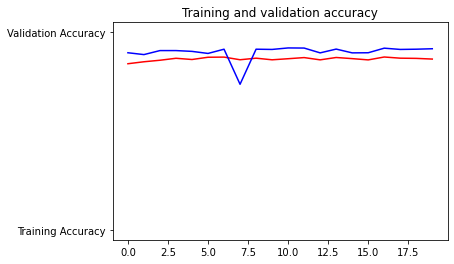

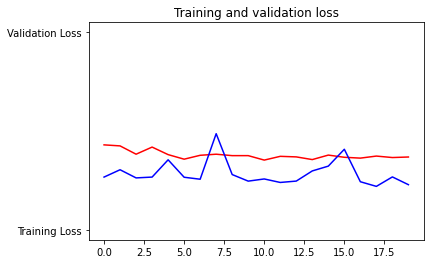

In [45]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')